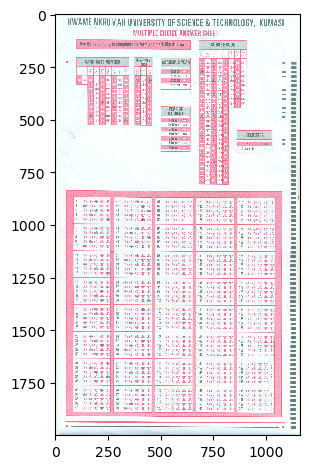

In [1]:
import cv2
from skimage import io
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

path = "./images/001.png"
width= 1162
height = 2000


image = cv2.imread(path)
img = cv2.resize(image, (width, height))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
io.imshow( img)

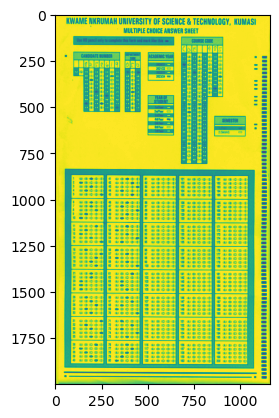

In [2]:
# Graying the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [12]:
imgBlur = cv2.GaussianBlur(img, (3, 3), 0)
img = cv2.Canny(imgBlur, 75, 220)
# plt.imshow(img)

# find contours in the thresholded image, then initialize
# the list of contours that correspond to questions
cnts,  _= cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imgBigContour = img.copy()
cv2.drawContours(imgBigContour, cnts, -1, (0, 255, 0), 10)
plt.imshow(imgBigContour)


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'drawContours'
> Overload resolution failed:
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type
>  - Can't parse 'contours'. Sequence item with index 0 has a wrong type


In [4]:
alpha = 1.7  # Contrast control (1.0-3.0)
beta = 0    # Brightness control (0-100)
img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)






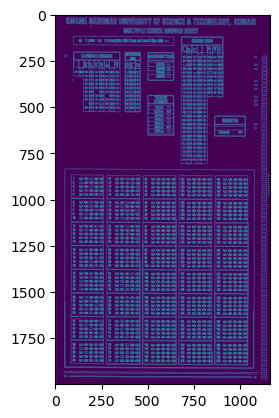

In [5]:
import numpy as np
# Apply sharpening filter
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)

plt.imshow(img)

In [6]:
import imutils
from imutils.perspective import four_point_transform
cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
docCnt = None

# ensure that at least one contour was found
if len(cnts) > 0:
    # sort the contours according to their size in
    # descending order
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

    # loop over the sorted contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if our approximated contour has four points,
        # then we can assume we have found the paper
        if len(approx) == 4:
            docCnt = approx
            break

# apply a four point perspective transform to both the
# original image and grayscale image to obtain a top-down
# birds eye view of the paper
paper = four_point_transform(img, docCnt.reshape(4, 2))
warped = four_point_transform(img, docCnt.reshape(4, 2))

# apply Otsu's thresholding method to binarize the warped
# piece of paper
thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]


# cnts = imutils.grab_contours(cnts)

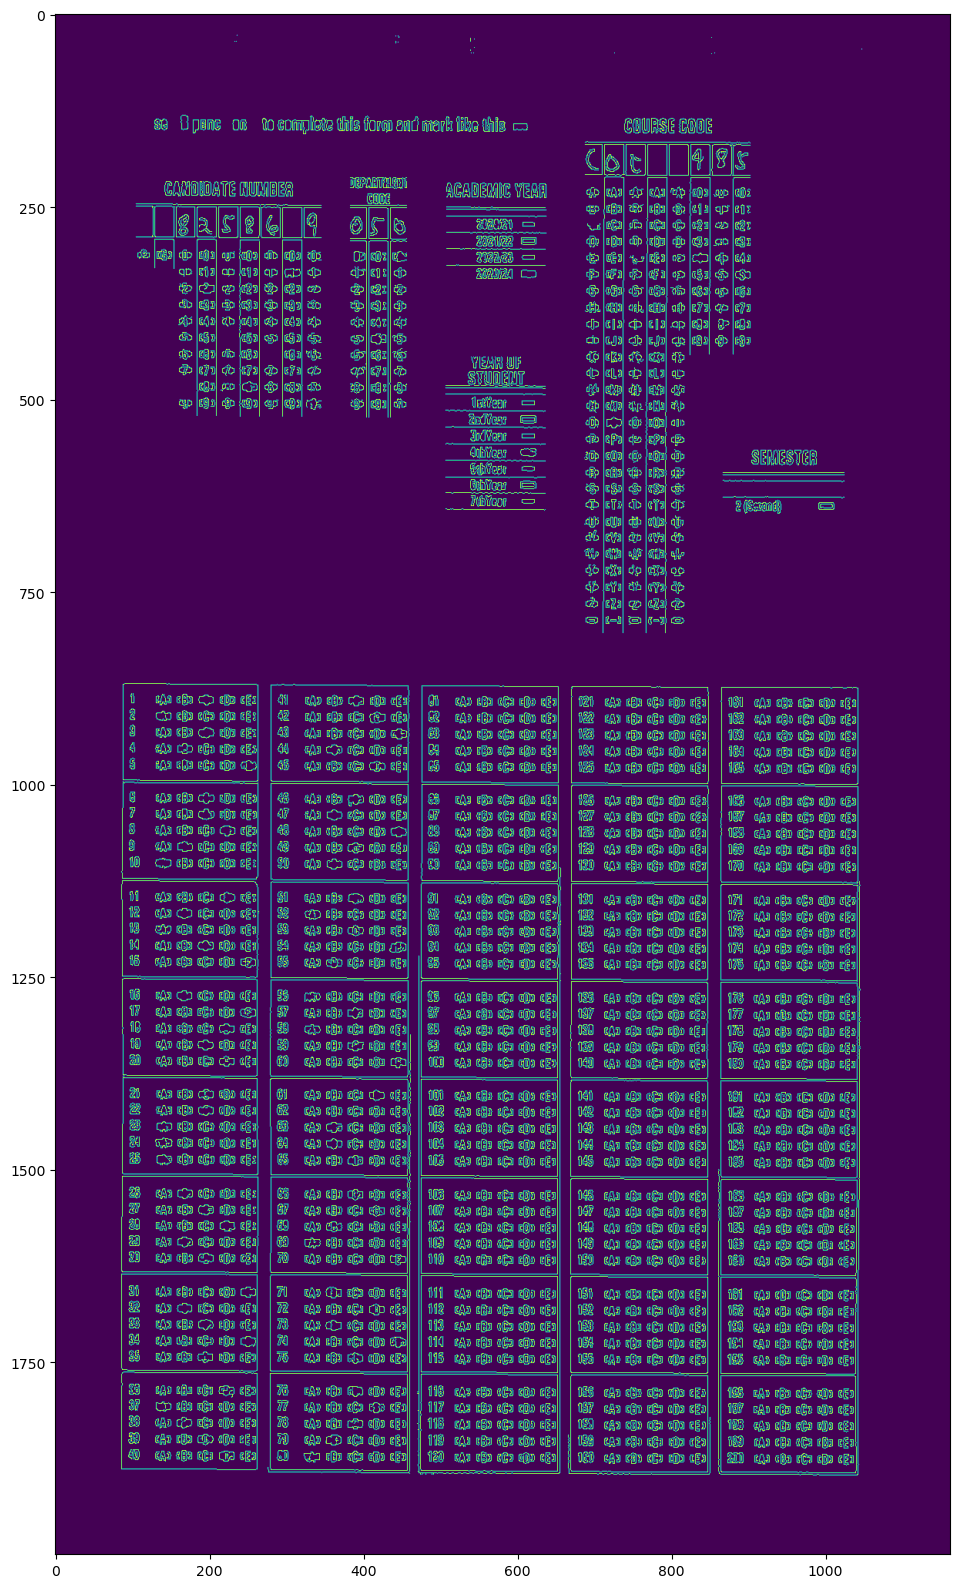

In [7]:
figure(figsize=(20, 20))
plt.imshow(imgBigContour)

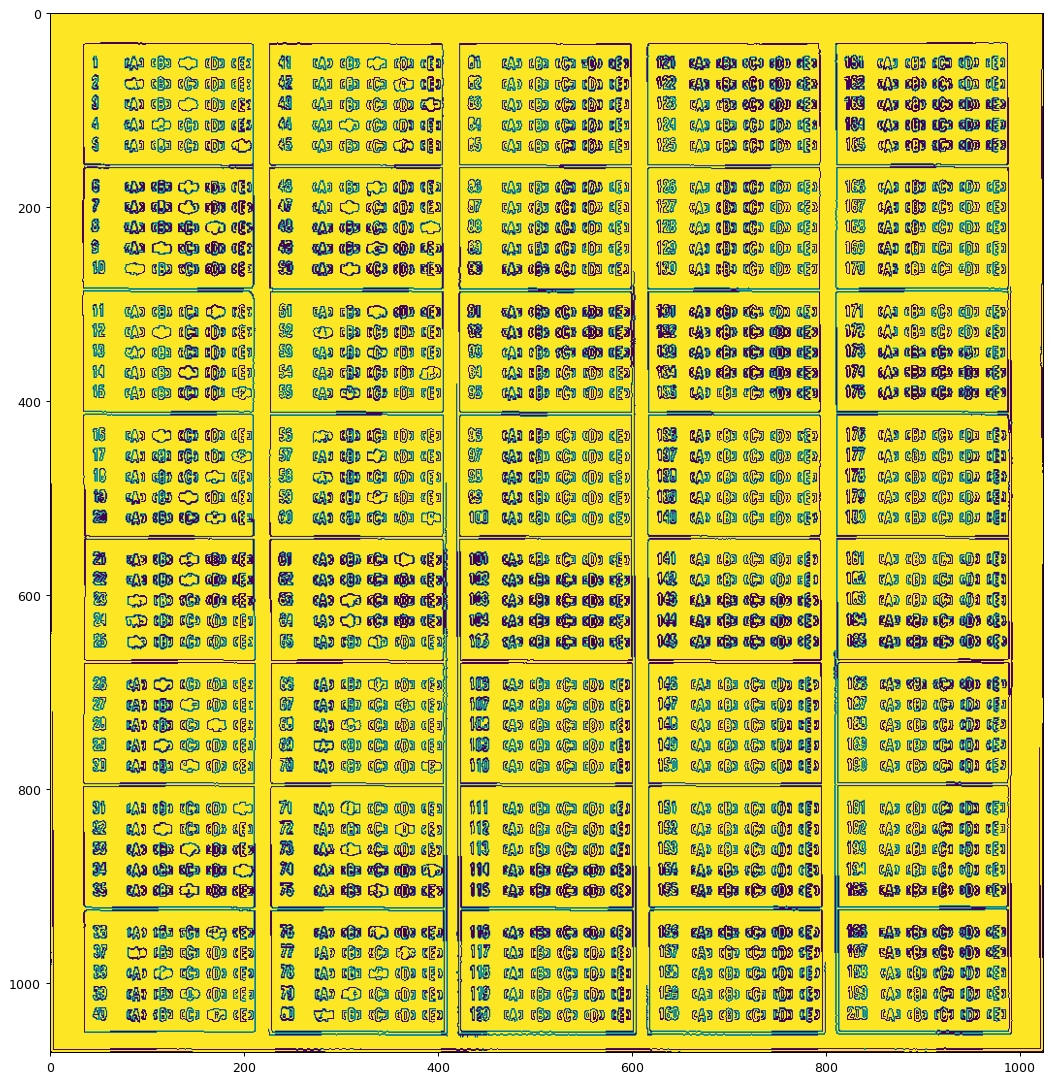

In [8]:
figure(figsize=(15, 15), dpi=90)
plt.imshow(thresh)   


In [9]:
cnts[0]

array([[[  57,  836]],

       [[  56,  837]],

       [[  54,  837]],

       [[  54,  838]],

       [[  53,  839]],

       [[  53, 1476]],

       [[  52, 1477]],

       [[  53, 1478]],

       [[  52, 1479]],

       [[  52, 1569]],

       [[  51, 1570]],

       [[  51, 1806]],

       [[  52, 1807]],

       [[  51, 1808]],

       [[  51, 1813]],

       [[  52, 1814]],

       [[  52, 1817]],

       [[  51, 1818]],

       [[  52, 1819]],

       [[  51, 1820]],

       [[  51, 1909]],

       [[  52, 1909]],

       [[  53, 1910]],

       [[ 197, 1910]],

       [[ 198, 1911]],

       [[ 334, 1911]],

       [[ 335, 1912]],

       [[ 482, 1912]],

       [[ 483, 1913]],

       [[ 685, 1913]],

       [[ 686, 1914]],

       [[ 687, 1913]],

       [[ 691, 1913]],

       [[ 692, 1914]],

       [[ 698, 1914]],

       [[ 699, 1913]],

       [[ 700, 1913]],

       [[ 701, 1914]],

       [[ 931, 1914]],

       [[ 932, 1915]],

       [[ 936, 1915]],

       [[ 937, 1

/home/jhohannes/programming_env/image_processing/env/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


TypeError: Invalid shape (113, 1, 2) for image data

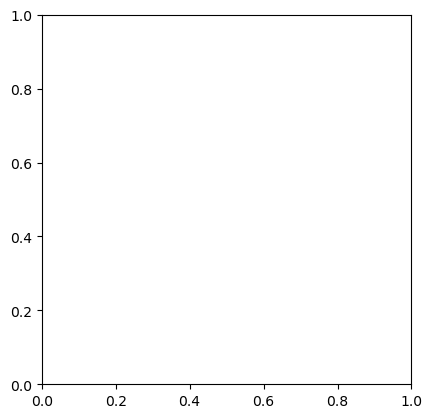

In [10]:
figure(1)
io.imshow(cnts[0])